In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
age_model = cv2.dnn.readNetFromCaffe('age.prototxt', 'dex_chalearn_iccv2015.caffemodel')

In [3]:
img_bgr = cv2.imread('../resources/image.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

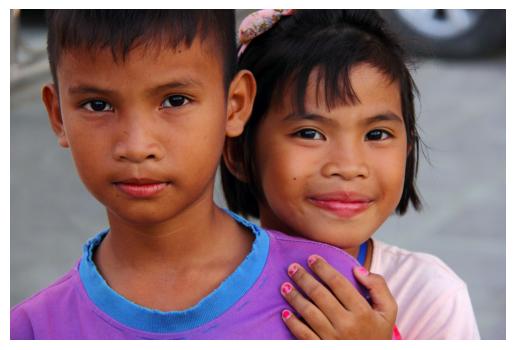

In [5]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [6]:
cv2.imshow('Image Display', img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [8]:
faces = detector.detectMultiScale(img_rgb, 1.3, 5)

In [9]:
x, y, w, h = faces[0]

In [10]:
faces

array([[ 76,  57, 503, 503],
       [660, 168, 409, 409]])

In [11]:
detected_face = img_rgb[int(y):int(y + h), int(x):int(x + w)]

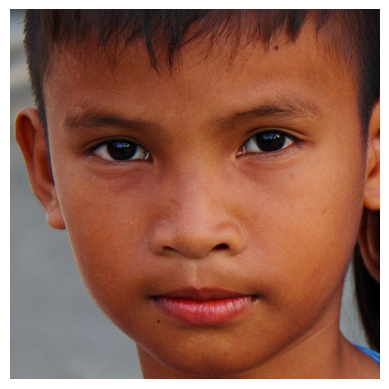

In [12]:
plt.imshow(detected_face)
plt.axis('off')
plt.show()

In [13]:
detected_face = cv2.resize(detected_face, (224, 224))

In [14]:
detected_face.shape

(224, 224, 3)

In [15]:
detected_face_blob = cv2.dnn.blobFromImage(detected_face)

In [16]:
detected_face_blob.shape

(1, 3, 224, 224)

In [17]:
age_model.setInput(detected_face_blob)
age_result = age_model.forward()

In [18]:
age_result

array([[1.32083835e-04, 3.51030118e-04, 8.96741622e-05, 2.46644777e-04,
        2.68250093e-04, 7.45371869e-03, 7.54820462e-03, 1.37631120e-02,
        1.52703263e-02, 2.09140647e-02, 1.02495383e-02, 4.67045419e-02,
        7.92847127e-02, 1.17139235e-01, 2.28079230e-01, 2.05110744e-01,
        1.22876175e-01, 7.41320103e-02, 2.41226815e-02, 1.04555162e-02,
        3.40311532e-03, 1.45771063e-03, 3.51203908e-03, 3.31965013e-04,
        3.99231620e-04, 3.20879277e-04, 6.94602277e-05, 1.56015449e-04,
        7.35299982e-05, 6.23689411e-05, 4.92830586e-05, 4.56473681e-05,
        5.86702117e-05, 7.90534032e-05, 2.54773535e-04, 1.00054684e-04,
        5.07230470e-05, 1.40266638e-04, 9.55764335e-05, 1.49923042e-04,
        1.85186218e-04, 2.47970835e-04, 1.34538699e-04, 1.61740551e-04,
        5.96180093e-04, 2.47128133e-04, 1.93396059e-04, 1.18622469e-04,
        2.91578937e-04, 1.65840582e-04, 2.16932225e-04, 1.23289865e-04,
        2.15241700e-04, 3.44457338e-04, 1.55578411e-04, 1.113191

In [19]:
indexes = np.array([i for i in range(0, 101)])

In [20]:
apparent_age = np.sum(age_result[0] * indexes)

In [21]:
apparent_age

14.219684424951993